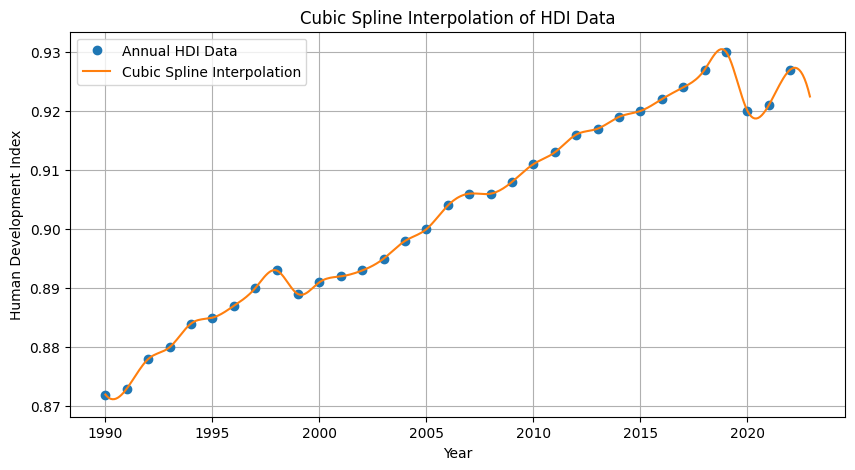

In [3]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel('HDI yearly data.xlsx')

# Assuming data['Year'] contains years up to 2021 and you want to include 2022
cs = CubicSpline(data['Year'], data['Human Development Index'])

# Generate monthly points from the minimum year to 2022
monthly_years = np.linspace(data['Year'].min(), 2022 + 1/12 * 11, (2022 - data['Year'].min() + 1) * 12)


# Evaluate the spline interpolation at these new points
monthly_hdi = cs(monthly_years)

# Ensure the content is drawn before saving
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Human Development Index'], 'o', label='Annual HDI Data')
plt.plot(monthly_years, monthly_hdi, label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation of HDI Data')
plt.xlabel('Year')
plt.ylabel('Human Development Index')
plt.legend()
plt.grid(True)

# Make sure to draw the canvas before saving
plt.gcf().canvas.draw()

# Save the figure with a transparent background and make sure it includes all plot elements
plt.savefig('spline_plot.png', bbox_inches='tight', format='png')
plt.show()
# Close the plot to free up memory
#plt.close()

In [4]:
# Create a DataFrame for the interpolated data
interpolated_data = pd.DataFrame({
    'Year': monthly_years,
    'Interpolated HDI': monthly_hdi
})

# Save the interpolated data to a CSV file
interpolated_data.to_excel('interpolated_hdiV2.xlsx', index=False)